# IMDB Movie Classification (Binary Classification)

## Loading the IMDB dataset

In [83]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras import models, layers



In [77]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Preparing the data

In [97]:
def vectorize_sequences( sequences, dimension = 10000):
    results = np.zeros(shape=(len(sequences), dimension))
    for i , sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train= vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [79]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the network

In [80]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

## Validating the approach

In [81]:
x_val = x_train[:10000]
partial_x_train= x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [82]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 14s 945us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_a

## Plotting the result of training

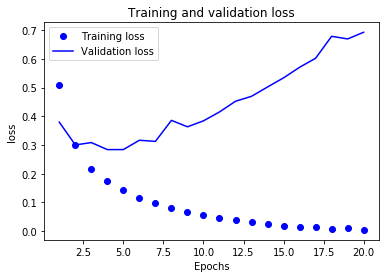

In [92]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo',label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

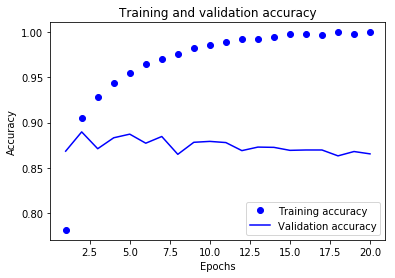

In [94]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo',label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [99]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 66us/step


[0.7680553059959412, 0.85]